<a href="https://colab.research.google.com/github/nandir2512/DeepLearning/blob/main/mlp_using_the_functional_api_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils

### Load Data

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# summarize loaded dataset

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


Load the CIFAR-10 dataset. x_train and x_test are numpy arrays of shape [50000, 32, 32, 3] and [10000, 32, 32, 3], respectively. y_train and y_test are numpy arrays of shape [50000, 1] and [10000, 1], respectively, containing the integer labels in the range 0 to 9 for the class of each image.

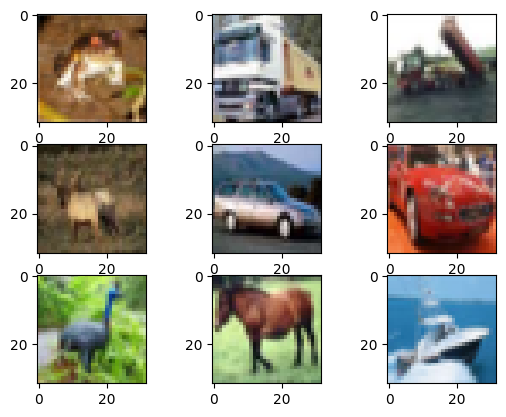

In [ ]:
for i in range(9):
  plt.subplot(330+1 + i)
  plt.imshow(x_train[i])

plt.show()

In [ ]:
NUM_CLASSES = 10

# convert from integers to floats

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels—the new shapes of y_train and y_test are [50000, 10] and [10000, 10], respectively.

In [ ]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
x_train[54, 12, 13, 1]

0.36862746

# *Type 2 -* Building our MLP using the functional API

In [ ]:
input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)

output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [ ]:
opt = optimizers.Adam(learning_rate= 0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Calling the fit method to train the model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8444 - accuracy: 0.3354
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6670 - accuracy: 0.4064
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5815 - accuracy: 0.4347
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5269 - accuracy: 0.4583
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4932 - accuracy: 0.4662
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4613 - accuracy: 0.4799
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4276 - accuracy: 0.4925
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4121 - accuracy: 0.4969
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3877 - accuracy: 0.5051
Epoch 10/10
1563/1563 [==============================] - 16s 10m

Evaluating the model performance on the test set

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4346 - accuracy: 0.4860


[1.434552788734436, 0.4860000014305115]

Viewing predictions on the test set using the predict method

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

313/313 [==============================] - 1s 3ms/step


* preds is an array of shape [10000, 10]—i.e., a vector of 10 class probabilities for each observation.

* We convert this array of probabilities back into a single prediction using numpy’s argmax function. Here, axis = –1 tells the function to collapse the array over the last dimension (the classes dimension), so that the shape of preds_single is then [10000, 1].

# Displaying predictions of the MLP against the actual labels

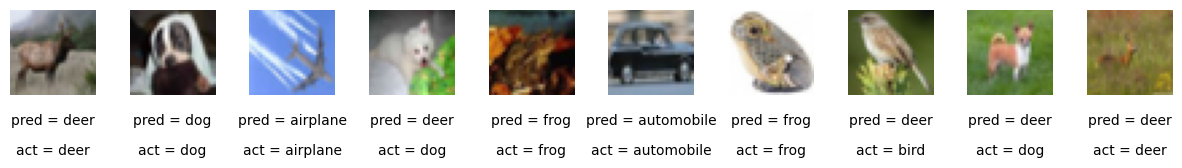

In [ ]:
n_to_show =10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax= fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
          , ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' +str(actual_single[idx]), fontsize=10,
          ha='center', transform=ax.transAxes)
  ax.imshow(img)